In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
#import the required Modules
import warnings
warnings.filterwarnings('ignore')
# Data visualization
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!nvidia-smi

Thu May 21 14:49:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
datapath = '/content/drive/My Drive/Financial_Risk_Participants_Data/'

In [5]:
filename1 = 'Train.csv'
filename2 = 'Test.csv'
filename3 = 'Sample_Submission.xlsx'
sep = ','
train = pd.read_csv(datapath+filename1,index_col=None,sep=sep)
test = pd.read_csv(datapath+filename2,index_col=None,sep=sep)
final_submission = pd.read_excel(datapath+filename3,index_col=None)
print(train.shape)
print(test.shape)
print(final_submission.shape)

(543, 8)
(233, 7)
(233, 2)


In [0]:
train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])

In [7]:
df.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,train_or_test
0,2,8.032,14,8,3,6,0,1.0,train
1,31,77.730,8,3,3,8,1,0.0,train
2,40,59.203,3,12,11,3,0,1.0,train
3,12,73.080,4,5,7,6,0,0.0,train
4,4,15.666,13,15,6,7,2,1.0,train


In [8]:
#Look at Target
df.IsUnderRisk.value_counts(dropna=False)

1.0    340
NaN    233
0.0    203
Name: IsUnderRisk, dtype: int64

In [9]:
#Summary Statistics
df.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,543.000000
mean,19.506443,32.358938,8.088918,7.356959,7.019330,5.565722,0.603093,0.626151
std,14.771724,24.961530,3.273523,3.471194,3.210208,1.800591,0.746391,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.044250,6.000000,5.000000,4.000000,4.000000,0.000000,0.000000
50%,13.000000,19.844000,8.000000,7.000000,6.000000,6.000000,1.000000,1.000000
75%,37.000000,62.680750,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [10]:
df.isnull().sum()

City                      0
Location_Score            0
Internal_Audit_Score      0
External_Audit_Score      0
Fin_Score                 0
Loss_score                0
Past_Results              0
IsUnderRisk             233
train_or_test             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 232
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  776 non-null    int64  
 1   Location_Score        776 non-null    float64
 2   Internal_Audit_Score  776 non-null    int64  
 3   External_Audit_Score  776 non-null    int64  
 4   Fin_Score             776 non-null    int64  
 5   Loss_score            776 non-null    int64  
 6   Past_Results          776 non-null    int64  
 7   IsUnderRisk           543 non-null    float64
 8   train_or_test         776 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 60.6+ KB


In [12]:
a = df.City.unique()
print(sorted(a))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


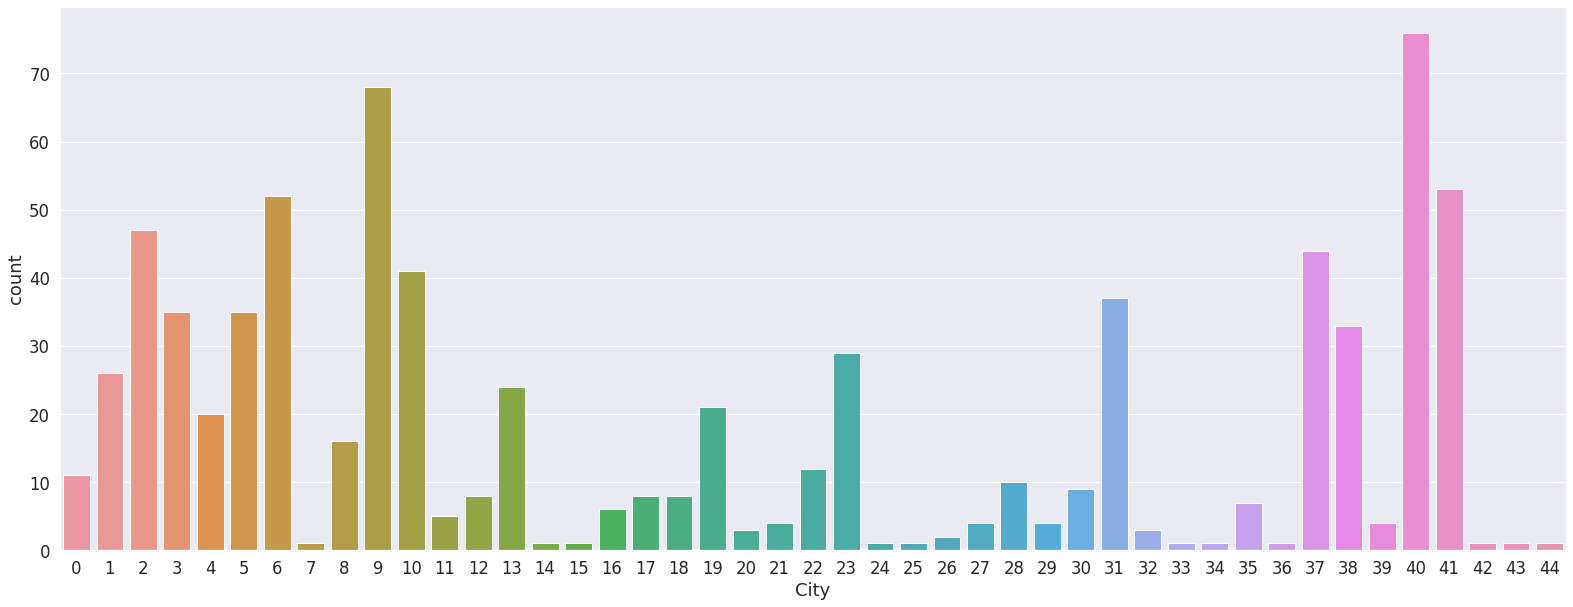

In [13]:
#just very inquisitive of this variable
sns.set(rc={'figure.figsize':(27,10)},font_scale=1.5)
sns.countplot(df["City"])

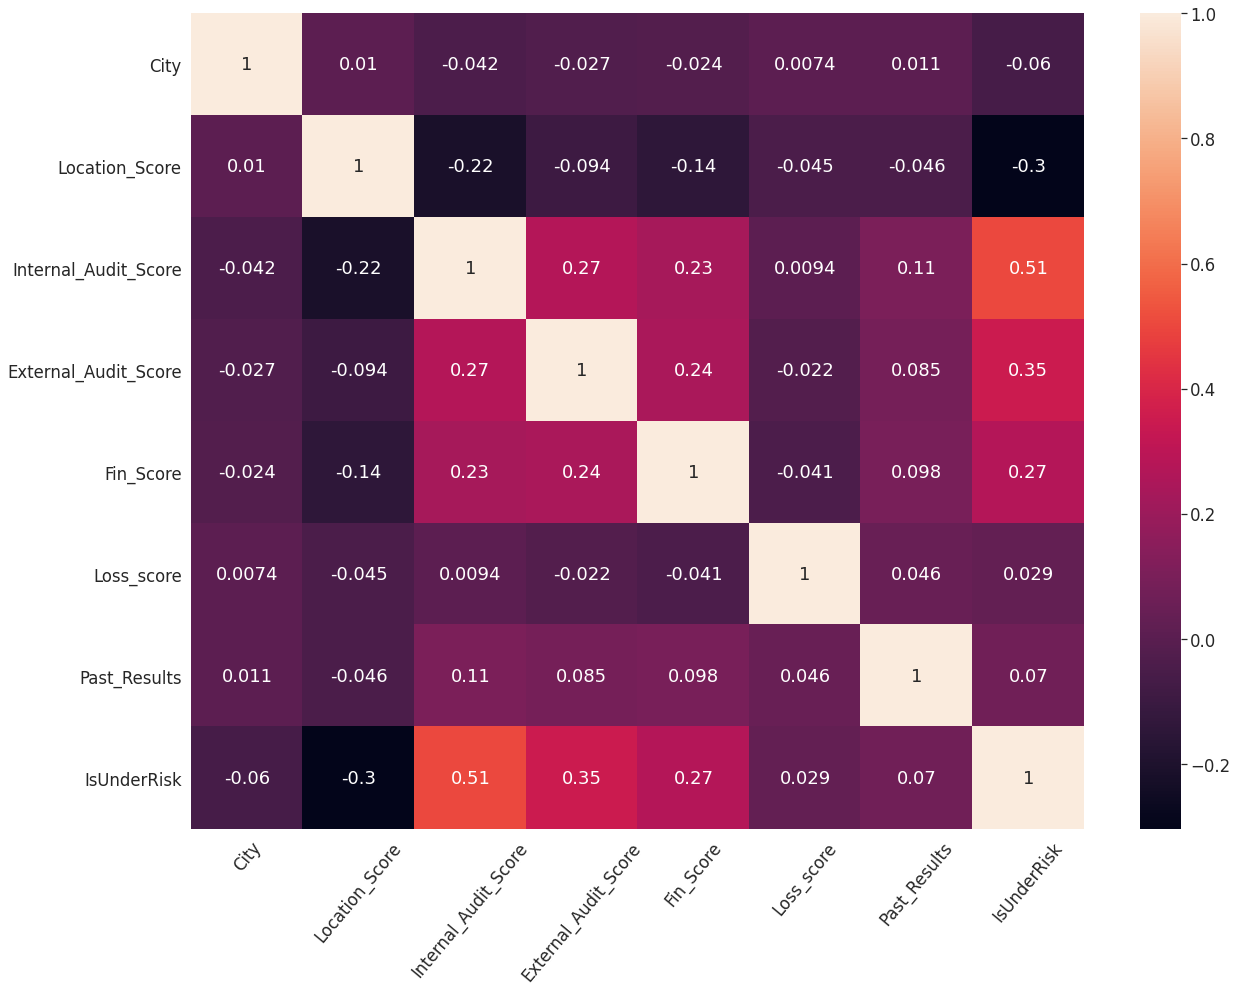

In [14]:
#Since all columns are Numeric we need to study the correlation and we will also look at non Linear relationship
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(method ='kendall'), xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values, annot=True);
plt.xticks(rotation=50)
plt.show()

In [15]:
#getting the top 5 values
df.corr(method='kendall').unstack().sort_values().drop_duplicates()[:5]

IsUnderRisk           Location_Score         -0.303984
Internal_Audit_Score  Location_Score         -0.217261
Fin_Score             Location_Score         -0.141194
Location_Score        External_Audit_Score   -0.094278
IsUnderRisk           City                   -0.059976
dtype: float64

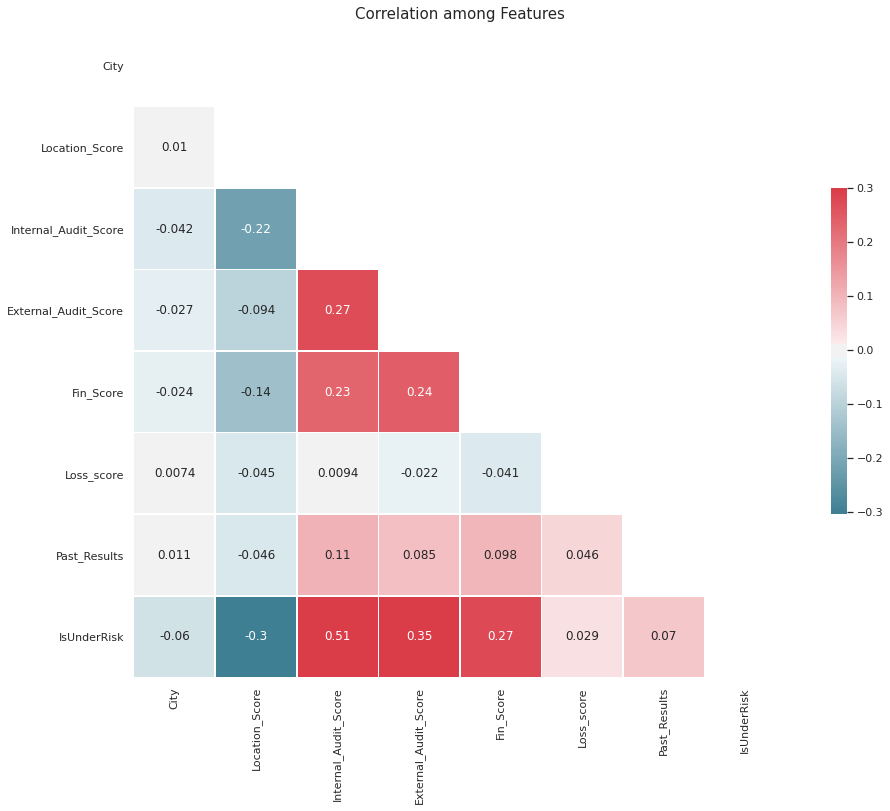

In [16]:
sns.set(style="white")
correlation = df.corr(method ='kendall')
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True);
plt.title("Correlation among Features",fontsize=15)
plt.show()

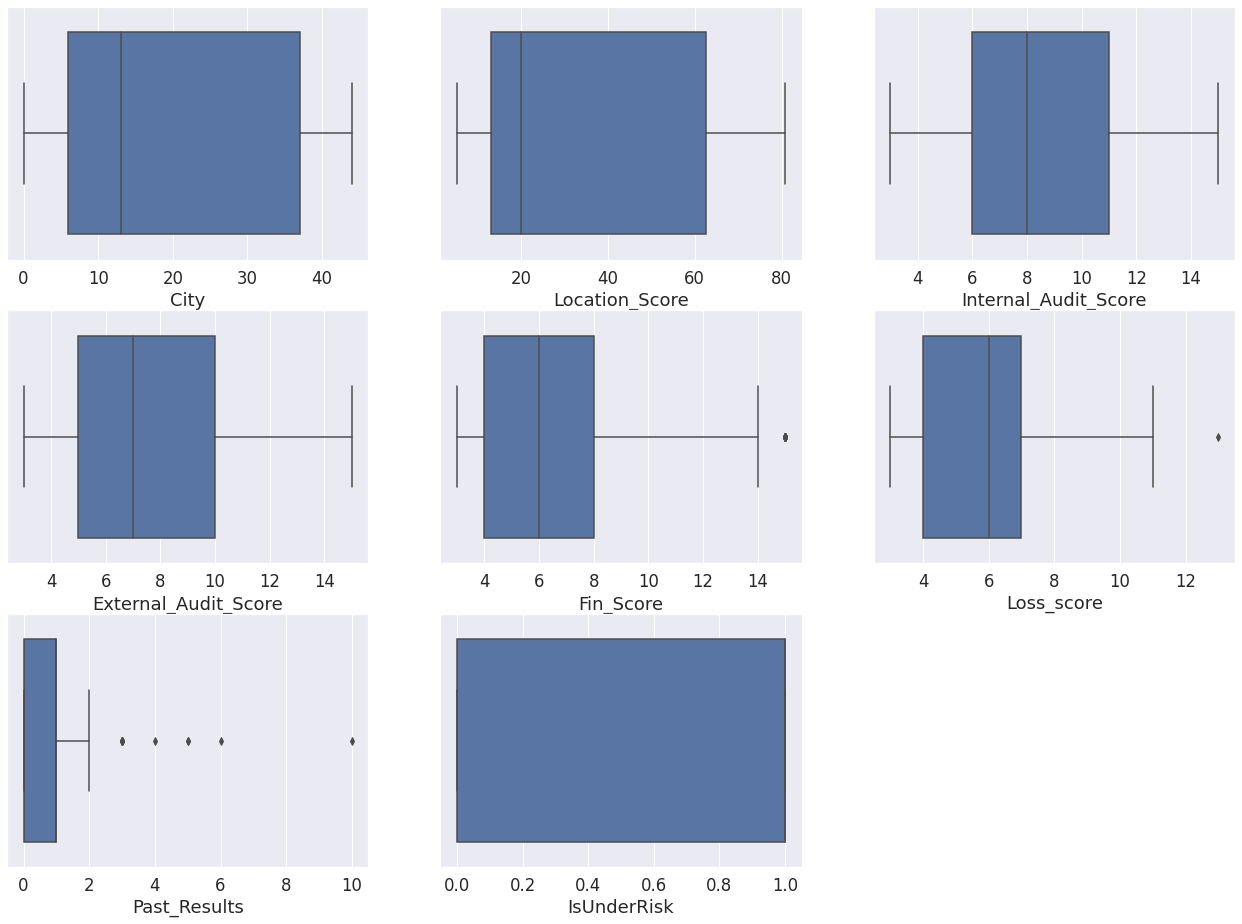

In [17]:
#Lets look for outliers using Boxplots
sns.set(rc={'figure.figsize':(22,27)},font_scale=1.5)
i = 1
num_cols=[]
for col in df.select_dtypes(['int64','float64']):
  num_cols.append(col)
for col in df[num_cols]:
    plt.subplot(5,3,i)
    sns.boxplot(df[col])
    i=i+1
    
plt.tight_layout
plt.show()

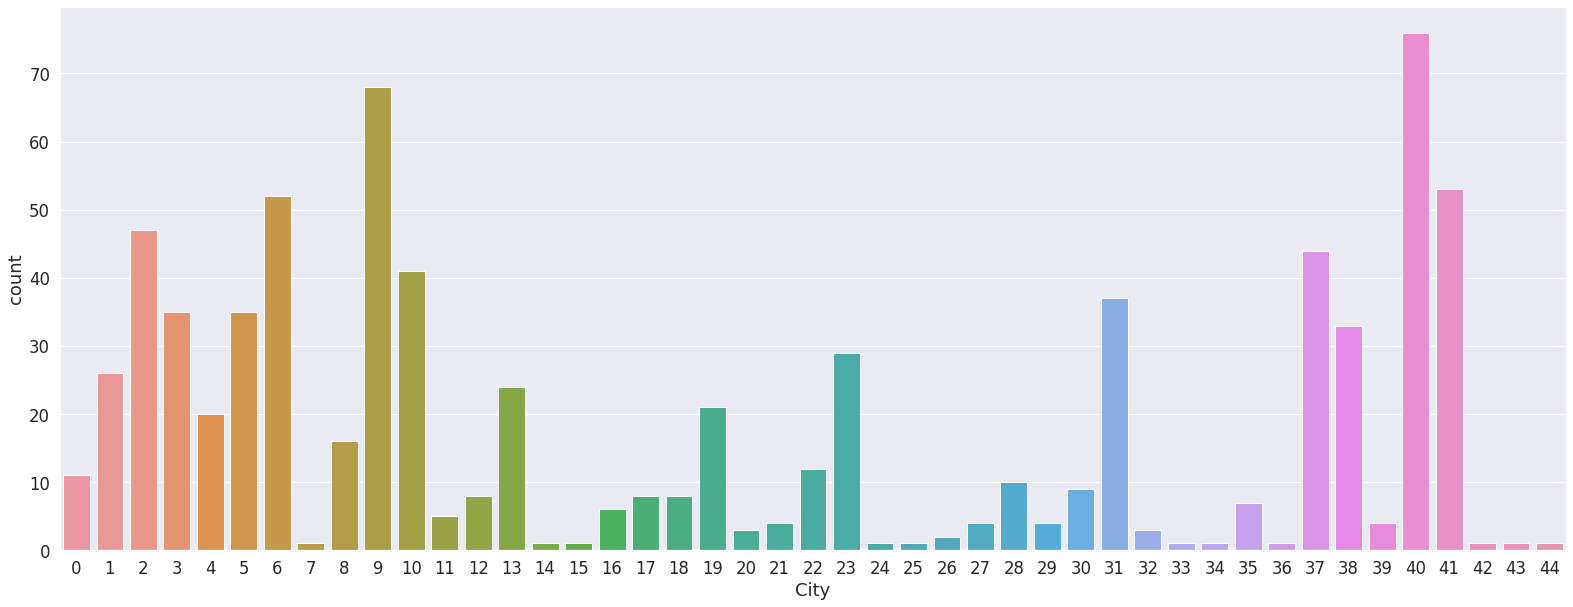

In [18]:
#just very inquisitive of this variable
sns.set(rc={'figure.figsize':(27,10)},font_scale=1.5)
sns.countplot(df["City"])

In [0]:
#Converting the City column into groups
df['City'] = pd.cut(df.City,bins=[0,4,10,15,20,25,30,35,40,44],
                    labels=['City_0-4','City_5-10','City_11-15','City_16-20','City_21-25','City_26-30','City_31-35','City_36-40','City_41-44'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 232
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   City                  765 non-null    category
 1   Location_Score        776 non-null    float64 
 2   Internal_Audit_Score  776 non-null    int64   
 3   External_Audit_Score  776 non-null    int64   
 4   Fin_Score             776 non-null    int64   
 5   Loss_score            776 non-null    int64   
 6   Past_Results          776 non-null    int64   
 7   IsUnderRisk           543 non-null    float64 
 8   train_or_test         776 non-null    object  
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 75.7+ KB


In [21]:
df.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,train_or_test
0,City_0-4,8.032,14,8,3,6,0,1.0,train
1,City_31-35,77.730,8,3,3,8,1,0.0,train
2,City_36-40,59.203,3,12,11,3,0,1.0,train
3,City_11-15,73.080,4,5,7,6,0,0.0,train
4,City_0-4,15.666,13,15,6,7,2,1.0,train


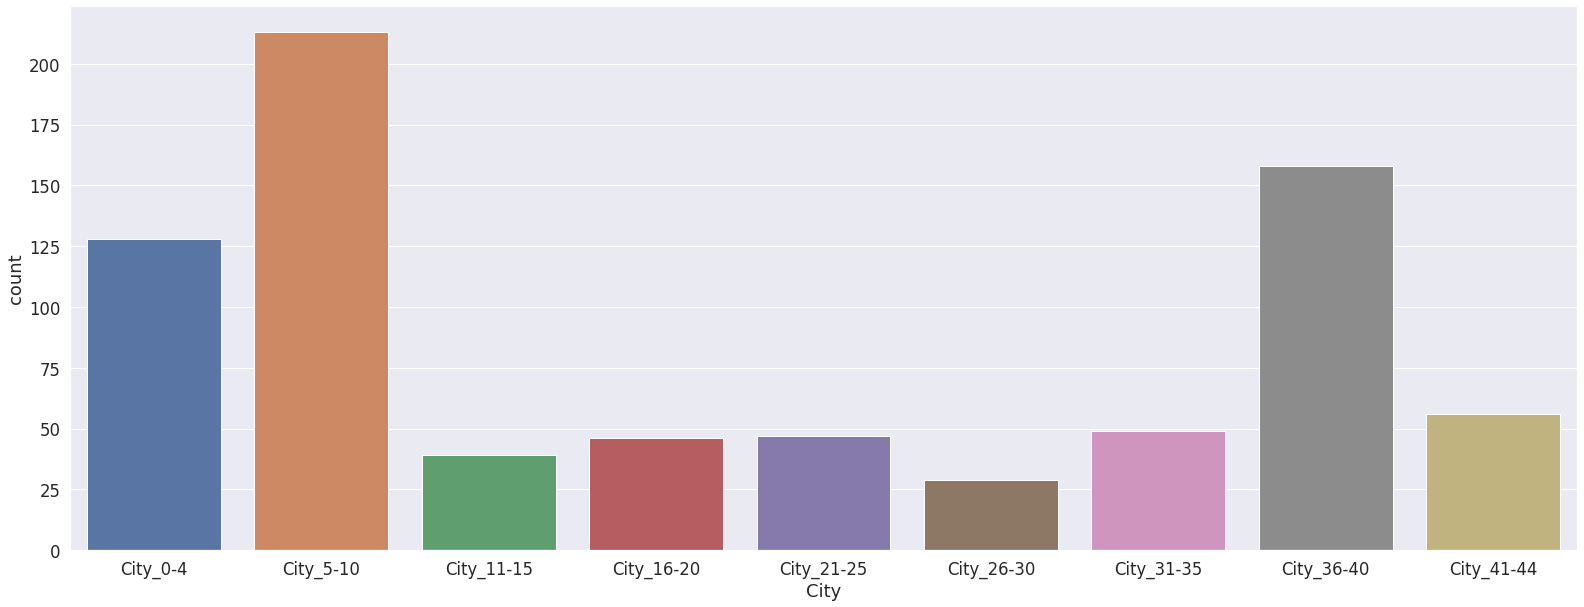

In [22]:
#now lets look into the distribution
sns.set(rc={'figure.figsize':(27,10)},font_scale=1.5)
sns.countplot(df["City"])

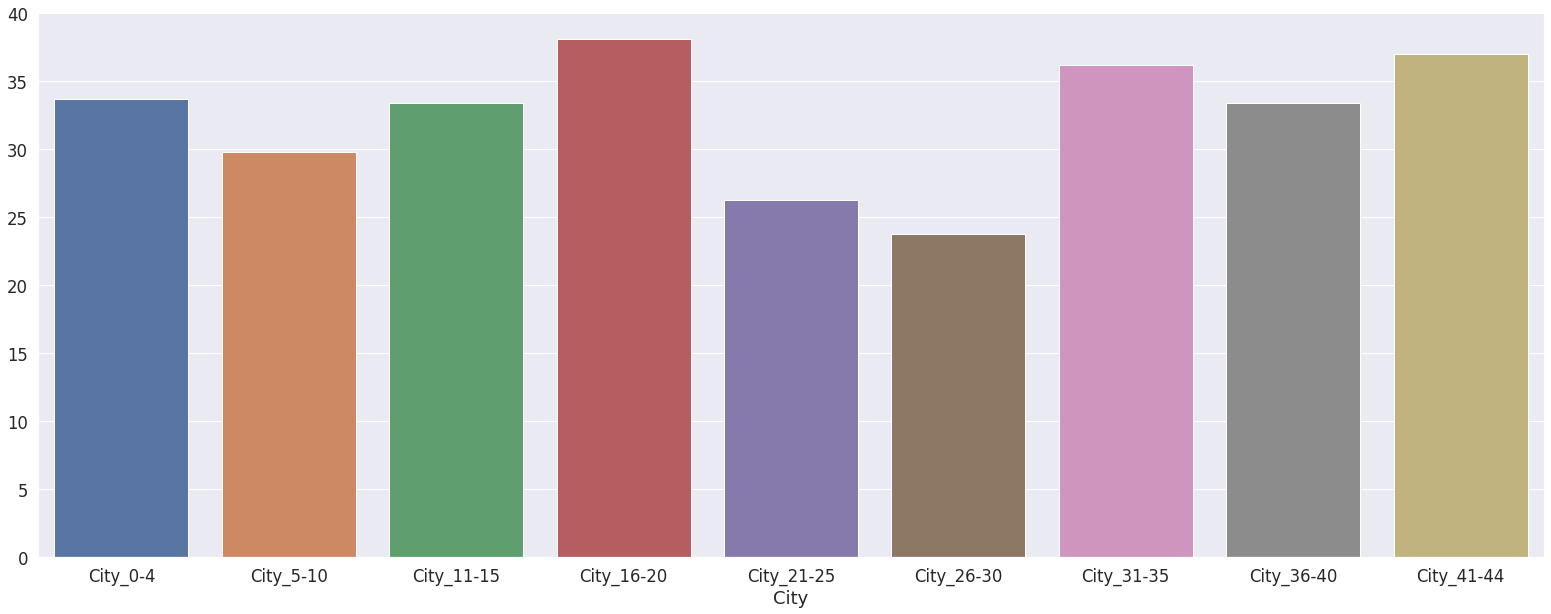

In [23]:
#lets look into Location Score wrto City bins
x = df.groupby("City")["Location_Score"].mean().index
y= df.groupby("City")["Location_Score"].mean().values
sns.barplot(x,y)

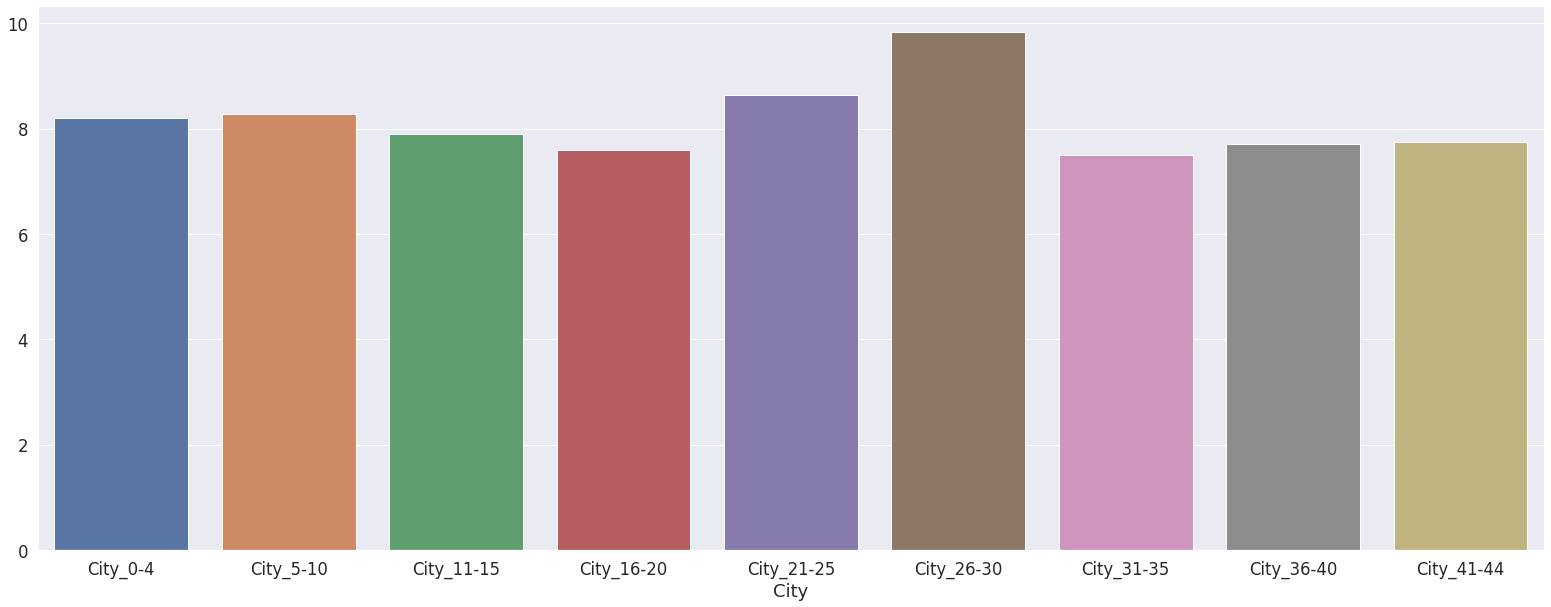

In [24]:
#lets look into Location Score wrto City bins
x = df.groupby("City")["Internal_Audit_Score"].mean().index
y= df.groupby("City")["Internal_Audit_Score"].mean().values
sns.barplot(x,y)

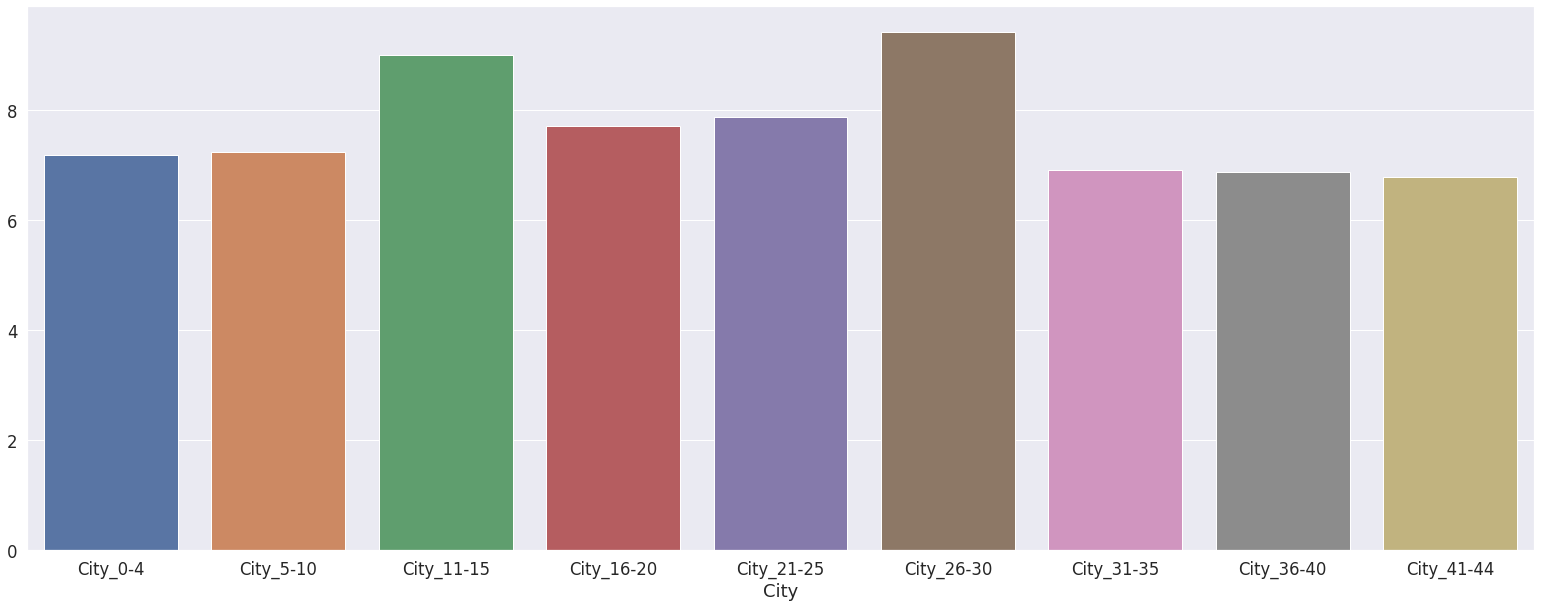

In [25]:
#lets look into Location Score wrto City bins
x = df.groupby("City")["External_Audit_Score"].mean().index
y= df.groupby("City")["External_Audit_Score"].mean().values
sns.barplot(x,y)

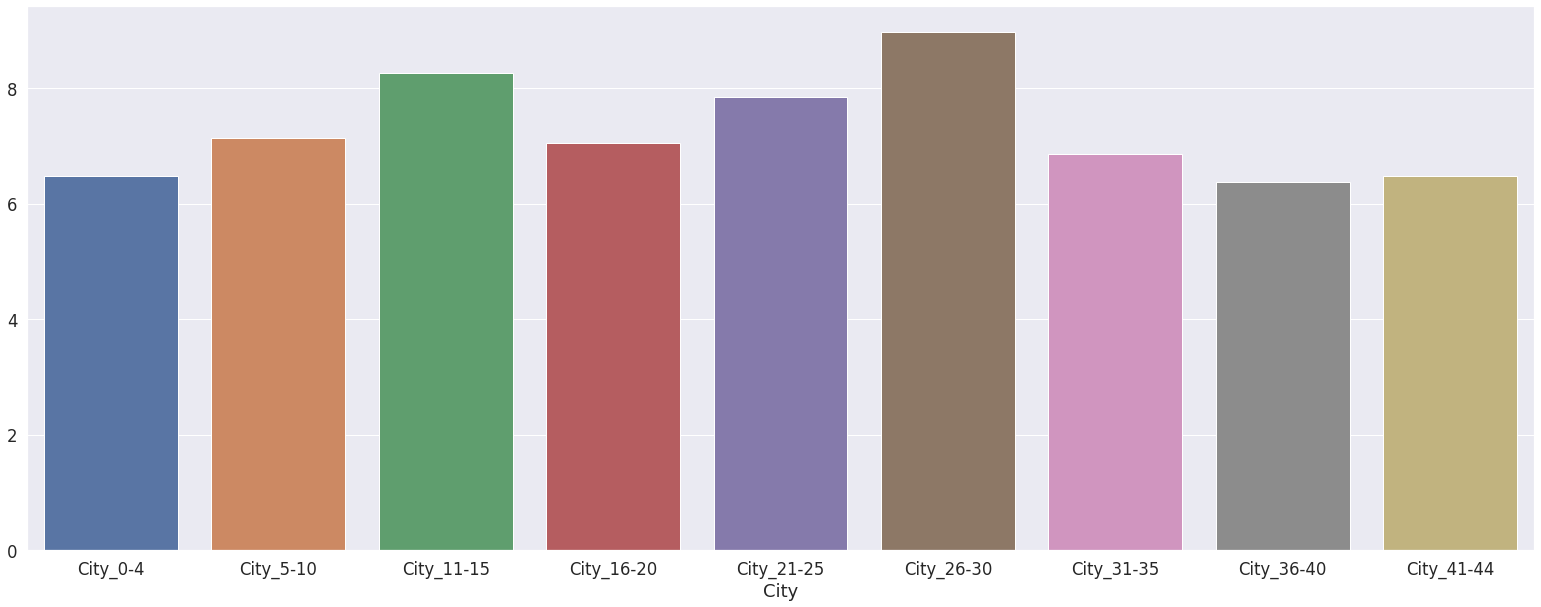

In [26]:
#lets look into Location Score wrto City bins
x = df.groupby("City")["Fin_Score"].mean().index
y= df.groupby("City")["Fin_Score"].mean().values
sns.barplot(x,y)

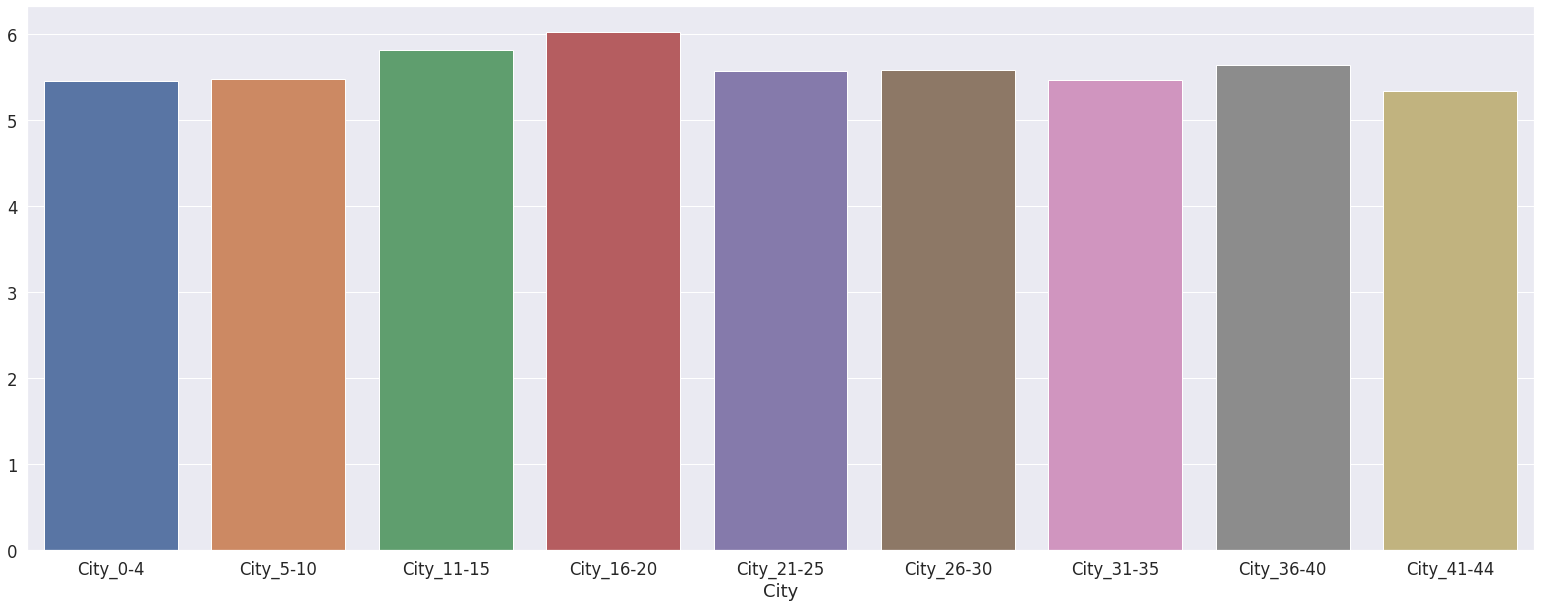

In [27]:
#lets look into Location Score wrto City bins
x = df.groupby("City")["Loss_score"].mean().index
y= df.groupby("City")["Loss_score"].mean().values
sns.barplot(x,y)

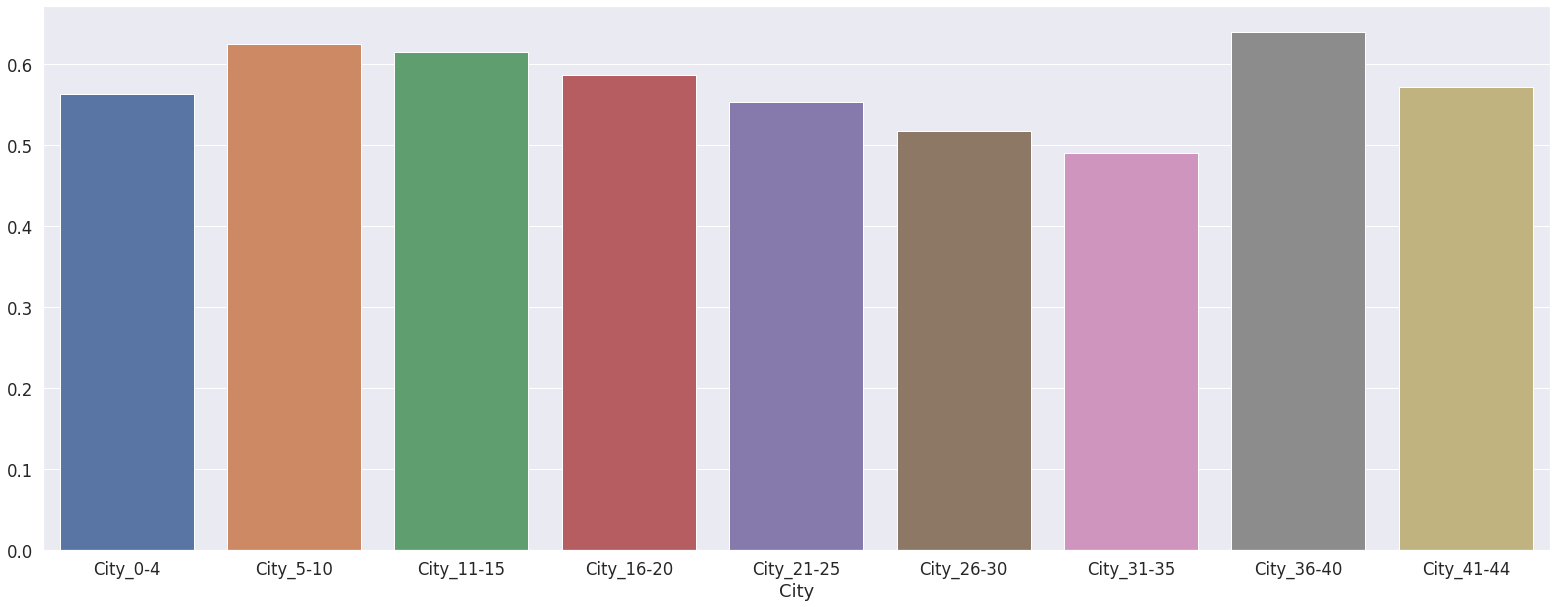

In [28]:
#lets look into Location Score wrto City bins
x = df.groupby("City")["Past_Results"].mean().index
y= df.groupby("City")["Past_Results"].mean().values
sns.barplot(x,y)

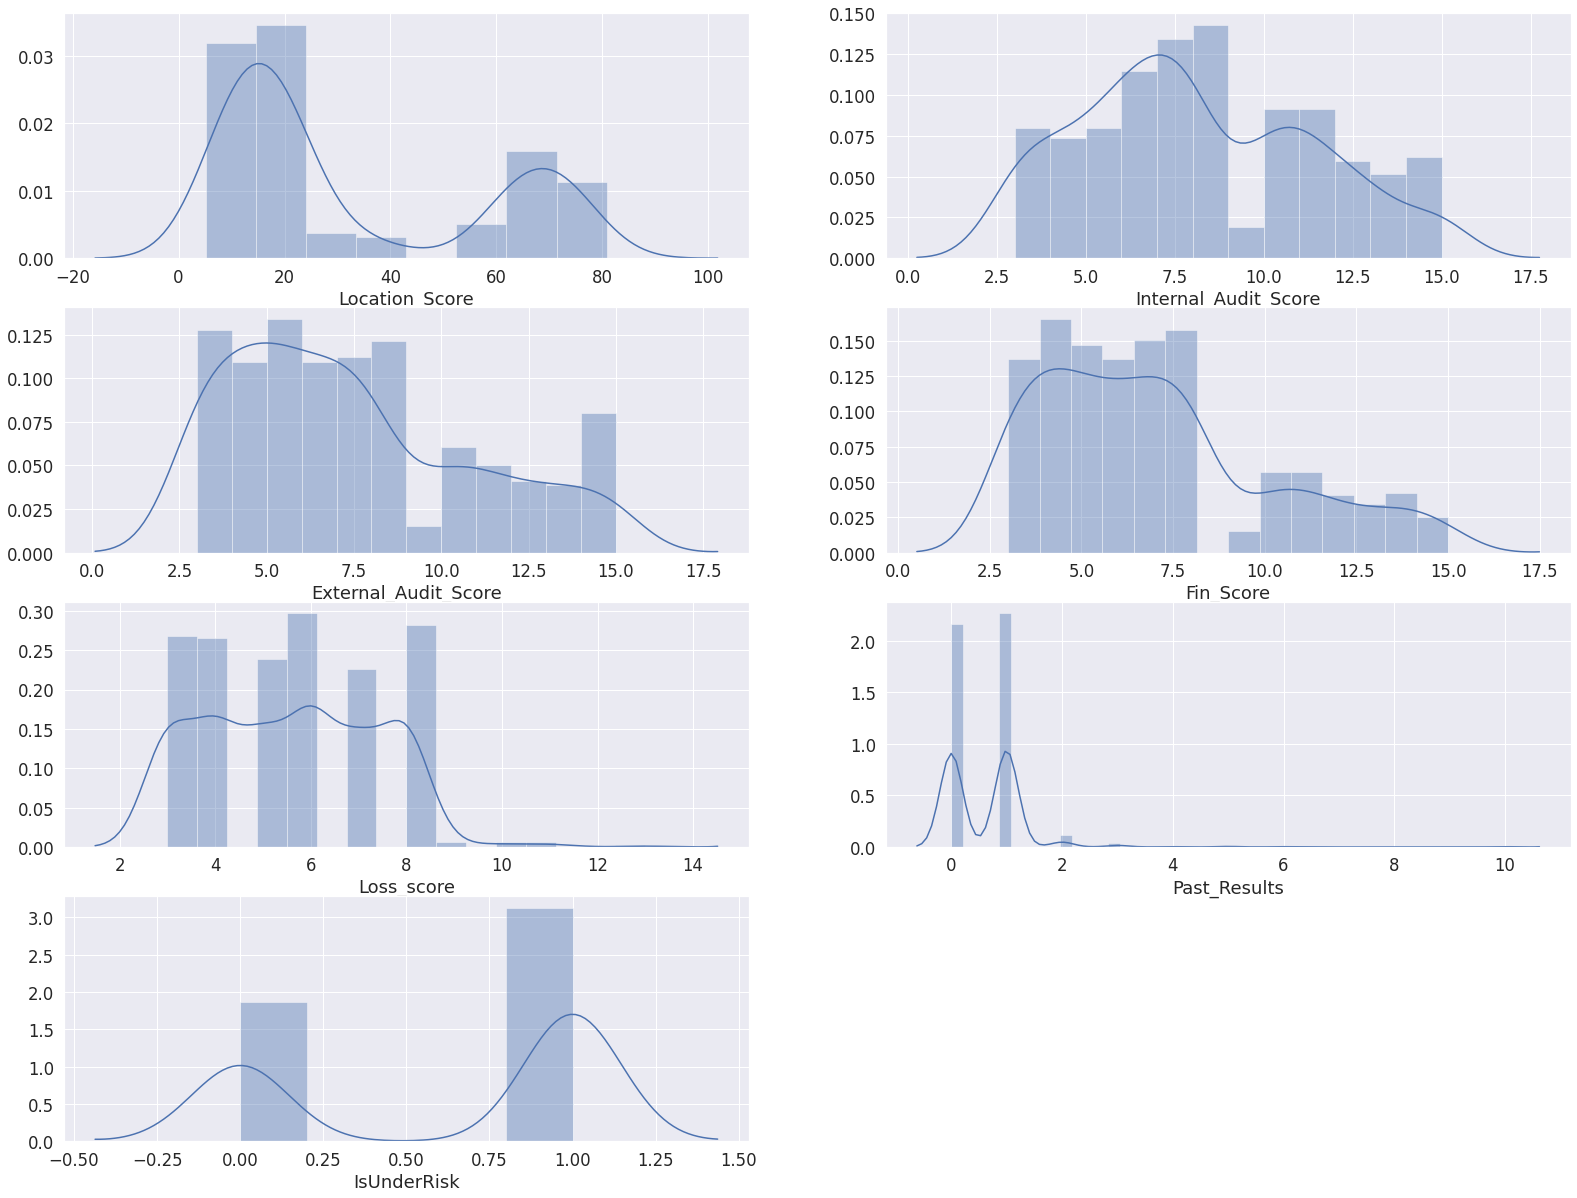

In [29]:
sns.set(rc={'figure.figsize':(27,37)},font_scale=1.5)
i=1
num_cols1= [i for i in num_cols if i!='City']
for p in num_cols1:
  plt.subplot(7,2,i)
  sns.distplot(df[p])
  i=i+1

plt.tight_layout
plt.show()

###Mostly the variables follow a Bimodal or Trimodal dispersion

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 232
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   City                  765 non-null    category
 1   Location_Score        776 non-null    float64 
 2   Internal_Audit_Score  776 non-null    int64   
 3   External_Audit_Score  776 non-null    int64   
 4   Fin_Score             776 non-null    int64   
 5   Loss_score            776 non-null    int64   
 6   Past_Results          776 non-null    int64   
 7   IsUnderRisk           543 non-null    float64 
 8   train_or_test         776 non-null    object  
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 75.7+ KB


In [0]:
df['IsUnderRisk_cat']= df.IsUnderRisk.astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 232
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   City                  765 non-null    category
 1   Location_Score        776 non-null    float64 
 2   Internal_Audit_Score  776 non-null    int64   
 3   External_Audit_Score  776 non-null    int64   
 4   Fin_Score             776 non-null    int64   
 5   Loss_score            776 non-null    int64   
 6   Past_Results          776 non-null    int64   
 7   IsUnderRisk           543 non-null    float64 
 8   train_or_test         776 non-null    object  
 9   IsUnderRisk_cat       543 non-null    category
dtypes: category(2), float64(2), int64(5), object(1)
memory usage: 76.6+ KB


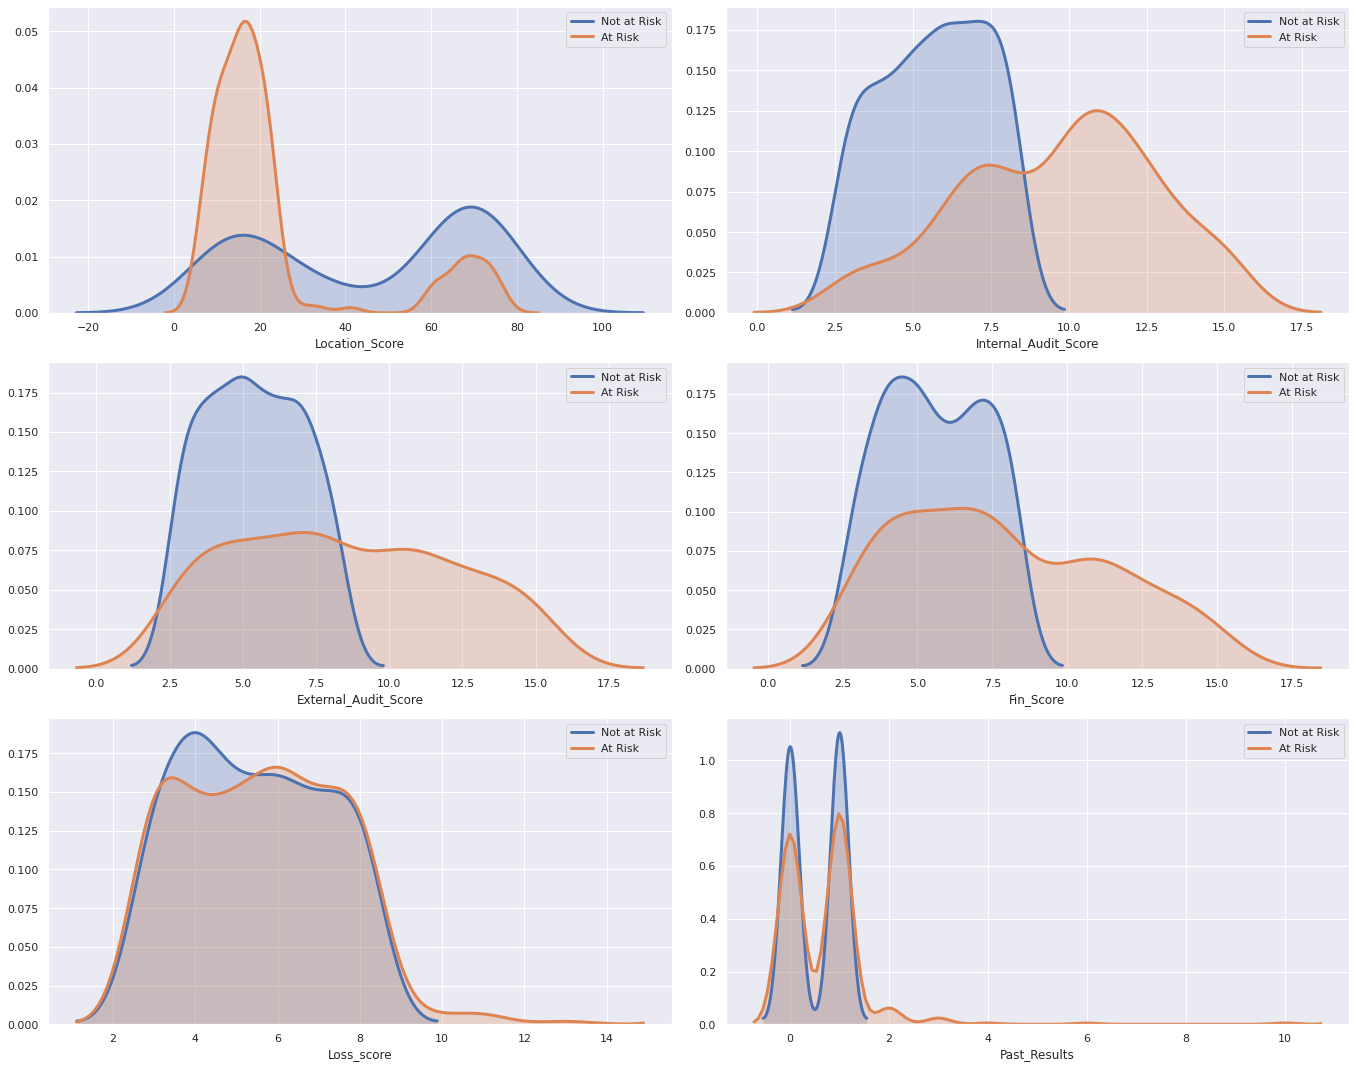

In [33]:
sns.set()
fig = plt.figure(figsize=(19,15))
i=1
for column in df.select_dtypes(["int64","float64"]):
  if column != 'IsUnderRisk':
    plt.subplot(3,2,i)
    sns.distplot(df.loc[df.IsUnderRisk_cat==0,column],hist=False,kde=True,
                kde_kws={'shade': True, 'linewidth':3},
                label='Not at Risk')
    sns.distplot(df.loc[df.IsUnderRisk_cat==1,column],hist=False,kde=True,
                kde_kws={'shade': True, 'linewidth':3},
                label='At Risk')
    i=i+1
plt.tight_layout()
plt.show()

#Inferences from the Continous Variables Distriution

1.   For Location Score bewteen 0-25 pose a greater risk 
2.   Internal Audit Score below 10 pose a lower risk while from 10-17.5 pose a higher risk
3. In rest other columns, we see lot of bimodal/trimodal distribution present, and there are lot of values which range above the normal range.



In [0]:
def bivariate_cat(data,col1,col2,rot):
    if col2=='IsUnderRisk_cat':
        cross_tab = pd.crosstab(data[col1], data[col2]).apply(lambda x: x/x.sum() * 100, axis=1).round(2)
        cross_tab.plot.bar(figsize=(12,5))
        plt.xlabel('{}'.format(col1))
        plt.ylabel('% of clients at Risk'.format(col1))
        plt.title('{} Vs Whether at Risk'.format(col1))
        plt.xticks(rotation=rot)
        plt.show()
        return cross_tab

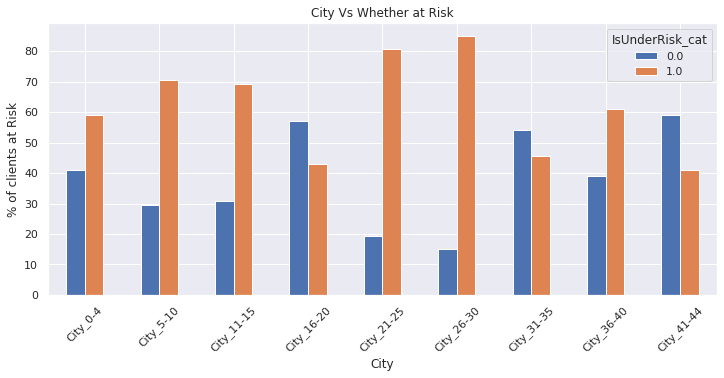

IsUnderRisk_cat,0.0,1.0
City,,
City_0-4,40.96,59.04
City_5-10,29.49,70.51
City_11-15,30.77,69.23
City_16-20,57.14,42.86
City_21-25,19.35,80.65
City_26-30,15.00,85.00
City_31-35,54.29,45.71
City_36-40,39.09,60.91
City_41-44,58.97,41.03


In [35]:
bivariate_cat(df, 'City','IsUnderRisk_cat',45)

#Inferences from Distribution from Categorical Variable

1.  Here we can infer that Cities in the lot 21-30 are at the highest under risk
2.  Also Cities 16-20,31-35 & 40-44 are those which are the safest cities
3.  Leaving the safest city all are under risk


 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 232
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   City                  765 non-null    category
 1   Location_Score        776 non-null    float64 
 2   Internal_Audit_Score  776 non-null    int64   
 3   External_Audit_Score  776 non-null    int64   
 4   Fin_Score             776 non-null    int64   
 5   Loss_score            776 non-null    int64   
 6   Past_Results          776 non-null    int64   
 7   IsUnderRisk           543 non-null    float64 
 8   train_or_test         776 non-null    object  
 9   IsUnderRisk_cat       543 non-null    category
dtypes: category(2), float64(2), int64(5), object(1)
memory usage: 76.6+ KB


In [0]:
#feature Engineering
df["Location_Score_per_City_bin"] = df["Location_Score"]/df.groupby(['City'])['Location_Score'].transform('mean')
df["Internal_Audit_Score_per_City_bin"] = df["Internal_Audit_Score"]/df.groupby(['City'])['Internal_Audit_Score'].transform('mean')
df["External_Audit_Score_per_City_bin"] = df["External_Audit_Score"]/df.groupby(['City'])['External_Audit_Score'].transform('mean')
df["Fin_Score_per_City_bin"] = df["Fin_Score"]/df.groupby(['City'])['Fin_Score'].transform('mean')
df["Loss_score_per_City_bin"] = df["Loss_score"]/df.groupby(['City'])['Loss_score'].transform('mean')
df["Past_Results_per_City_bin"] = df["Past_Results"]/df.groupby(['City'])['Past_Results'].transform('mean')

In [0]:
#label Encoding City variable/Map The values
df['City_le'] = df['City'].cat.codes.astype('float64')

In [0]:
#One Hot encoding
cat_cols = ["City"]
df= pd.get_dummies(df, columns=cat_cols)

In [0]:
#differentiate Train and test
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test'},axis=1,inplace=True)
test.drop(columns={'train_or_test'},axis=1,inplace=True)

In [0]:
#target Encoding 
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [0]:
#Target Encoding City variable
tr_g, te_g = target_encode(train["City_le"], 
                         test["City_le"], 
                         target=train.IsUnderRisk, 
                         min_samples_leaf=100,
                         smoothing=10,
                         noise_level=0.01)
train['City_te']=tr_g
test['City_te']=te_g

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 542
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Location_Score                     543 non-null    float64 
 1   Internal_Audit_Score               543 non-null    int64   
 2   External_Audit_Score               543 non-null    int64   
 3   Fin_Score                          543 non-null    int64   
 4   Loss_score                         543 non-null    int64   
 5   Past_Results                       543 non-null    int64   
 6   IsUnderRisk                        543 non-null    float64 
 7   IsUnderRisk_cat                    543 non-null    category
 8   Location_Score_per_City_bin        535 non-null    float64 
 9   Internal_Audit_Score_per_City_bin  535 non-null    float64 
 10  External_Audit_Score_per_City_bin  535 non-null    float64 
 11  Fin_Score_per_City_bin             535 non-nu

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 232
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Location_Score                     233 non-null    float64 
 1   Internal_Audit_Score               233 non-null    int64   
 2   External_Audit_Score               233 non-null    int64   
 3   Fin_Score                          233 non-null    int64   
 4   Loss_score                         233 non-null    int64   
 5   Past_Results                       233 non-null    int64   
 6   IsUnderRisk                        0 non-null      float64 
 7   IsUnderRisk_cat                    0 non-null      category
 8   Location_Score_per_City_bin        230 non-null    float64 
 9   Internal_Audit_Score_per_City_bin  230 non-null    float64 
 10  External_Audit_Score_per_City_bin  230 non-null    float64 
 11  Fin_Score_per_City_bin             230 non-nu

In [45]:
#check for NAN values before Scaling 
test.isnull().sum()

Location_Score                         0
Internal_Audit_Score                   0
External_Audit_Score                   0
Fin_Score                              0
Loss_score                             0
Past_Results                           0
IsUnderRisk                          233
IsUnderRisk_cat                      233
Location_Score_per_City_bin            3
Internal_Audit_Score_per_City_bin      3
External_Audit_Score_per_City_bin      3
Fin_Score_per_City_bin                 3
Loss_score_per_City_bin                3
Past_Results_per_City_bin              3
City_le                                0
City_City_0-4                          0
City_City_5-10                         0
City_City_11-15                        0
City_City_16-20                        0
City_City_21-25                        0
City_City_26-30                        0
City_City_31-35                        0
City_City_36-40                        0
City_City_41-44                        0
City_te         

In [0]:
float_cols=[]
for col in test.select_dtypes(['float64']):
  if i !='IsUnderRisk':
    float_cols.append(col)
for col in float_cols:
  test[col]= test[col].fillna(0)

In [47]:
#check for NAN values before Scaling 
test.isnull().sum()

Location_Score                         0
Internal_Audit_Score                   0
External_Audit_Score                   0
Fin_Score                              0
Loss_score                             0
Past_Results                           0
IsUnderRisk                            0
IsUnderRisk_cat                      233
Location_Score_per_City_bin            0
Internal_Audit_Score_per_City_bin      0
External_Audit_Score_per_City_bin      0
Fin_Score_per_City_bin                 0
Loss_score_per_City_bin                0
Past_Results_per_City_bin              0
City_le                                0
City_City_0-4                          0
City_City_5-10                         0
City_City_11-15                        0
City_City_16-20                        0
City_City_21-25                        0
City_City_26-30                        0
City_City_31-35                        0
City_City_36-40                        0
City_City_41-44                        0
City_te         

In [0]:
# MinMax Scaling
train.drop(['IsUnderRisk_cat','City_le'],axis=1,inplace=True)
test.drop(['IsUnderRisk_cat','City_le'],axis=1,inplace=True)
col = []
for features in train.select_dtypes(include=['int64','float64']):
  if features!='IsUnderRisk':
    col.append(features)
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
train[col] = mm.fit_transform(train[col].values)
test[col] = mm.fit_transform(test[col].values)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 542
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Location_Score                     543 non-null    float64
 1   Internal_Audit_Score               543 non-null    float64
 2   External_Audit_Score               543 non-null    float64
 3   Fin_Score                          543 non-null    float64
 4   Loss_score                         543 non-null    float64
 5   Past_Results                       543 non-null    float64
 6   IsUnderRisk                        543 non-null    float64
 7   Location_Score_per_City_bin        535 non-null    float64
 8   Internal_Audit_Score_per_City_bin  535 non-null    float64
 9   External_Audit_Score_per_City_bin  535 non-null    float64
 10  Fin_Score_per_City_bin             535 non-null    float64
 11  Loss_score_per_City_bin            535 non-null    float64

In [50]:
train.head()

,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,Location_Score_per_City_bin,Internal_Audit_Score_per_City_bin,External_Audit_Score_per_City_bin,Fin_Score_per_City_bin,Loss_score_per_City_bin,Past_Results_per_City_bin,City_City_0-4,City_City_5-10,City_City_11-15,City_City_16-20,City_City_21-25,City_City_26-30,City_City_31-35,City_City_36-40,City_City_41-44,City_te
0,0.037647,0.916667,0.416667,0.000000,0.3,0.0,1.0,0.033739,0.825588,0.419888,0.064709,0.361616,0.000000,1,0,0,0,0,0,0,0,0,0.143067
1,0.959285,0.416667,0.000000,0.000000,0.5,0.1,0.0,0.688409,0.449410,0.060759,0.051998,0.580792,0.127484,0,0,0,0,0,0,1,0,0,0.268349
2,0.714297,0.000000,0.750000,0.666667,0.0,0.0,1.0,0.559268,0.049426,0.753534,0.703162,0.020348,0.000000,0,0,0,0,0,0,0,1,0,0.159635
3,0.897797,0.083333,0.166667,0.333333,0.3,0.0,0.0,0.701933,0.118548,0.125208,0.259376,0.320743,0.000000,0,0,1,0,0,0,0,0,0,0.279553
4,0.138594,0.833333,1.000000,0.250000,0.4,0.2,1.0,0.111510,0.753772,0.934683,0.298532,0.471885,0.222014,1,0,0,0,0,0,0,0,0,0.226863


In [51]:
test.head()

,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,Location_Score_per_City_bin,Internal_Audit_Score_per_City_bin,External_Audit_Score_per_City_bin,Fin_Score_per_City_bin,Loss_score_per_City_bin,Past_Results_per_City_bin,City_City_0-4,City_City_5-10,City_City_11-15,City_City_16-20,City_City_21-25,City_City_26-30,City_City_31-35,City_City_36-40,City_City_41-44,City_te
0,0.177329,0.833333,0.750000,0.500000,0.571429,0.0,0.0,0.182808,0.862066,0.800000,0.589936,0.763091,0.000000,0,0,0,0,0,0,0,0,1,0.233188
1,0.821757,0.250000,0.583333,0.333333,0.142857,0.2,0.0,0.629413,0.406427,0.586184,0.422272,0.386633,0.212763,0,0,0,1,0,0,0,0,0,0.233556
2,0.878419,0.000000,0.000000,0.333333,0.714286,0.0,0.0,0.704153,0.205850,0.196165,0.433746,0.851359,0.000000,0,0,0,0,0,0,1,0,0,0.278275
3,0.152675,1.000000,0.583333,0.333333,0.142857,0.2,0.0,0.181246,0.939747,0.629400,0.458681,0.426338,0.222014,1,0,0,0,0,0,0,0,0,0.137344
4,0.162177,0.333333,0.000000,0.416667,0.000000,0.2,0.0,0.213113,0.434635,0.187709,0.476643,0.318434,0.200000,0,1,0,0,0,0,0,0,0,0.802426


In [0]:
from sklearn.model_selection import StratifiedKFold
Y = train['IsUnderRisk']
X = train.iloc[:,train.columns !='IsUnderRisk']

In [53]:
X.isnull().sum()

Location_Score                       0
Internal_Audit_Score                 0
External_Audit_Score                 0
Fin_Score                            0
Loss_score                           0
Past_Results                         0
Location_Score_per_City_bin          8
Internal_Audit_Score_per_City_bin    8
External_Audit_Score_per_City_bin    8
Fin_Score_per_City_bin               8
Loss_score_per_City_bin              8
Past_Results_per_City_bin            8
City_City_0-4                        0
City_City_5-10                       0
City_City_11-15                      0
City_City_16-20                      0
City_City_21-25                      0
City_City_26-30                      0
City_City_31-35                      0
City_City_36-40                      0
City_City_41-44                      0
City_te                              0
dtype: int64

In [0]:
#replace Null in X with mean
float_cols=[]
for col in X.select_dtypes(['float64']):
  if i !='IsUnderRisk':
    float_cols.append(col)
for col in float_cols:
  X[col]= X[col].fillna(X[col].mean())

In [55]:
X.isnull().sum()

Location_Score                       0
Internal_Audit_Score                 0
External_Audit_Score                 0
Fin_Score                            0
Loss_score                           0
Past_Results                         0
Location_Score_per_City_bin          0
Internal_Audit_Score_per_City_bin    0
External_Audit_Score_per_City_bin    0
Fin_Score_per_City_bin               0
Loss_score_per_City_bin              0
Past_Results_per_City_bin            0
City_City_0-4                        0
City_City_5-10                       0
City_City_11-15                      0
City_City_16-20                      0
City_City_21-25                      0
City_City_26-30                      0
City_City_31-35                      0
City_City_36-40                      0
City_City_41-44                      0
City_te                              0
dtype: int64

In [0]:
# Create K_Folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 

In [0]:
for train_index, test_index in kfold.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

#Random Forest Classifier

In [59]:
RFC = RandomForestClassifier()

# Search grid for optimal parameters
rf_param_grid = {"max_depth":[None],
                 "max_features":[1,3,10],
                 "min_samples_split":[2,3,10],
                 "min_samples_leaf":[1,3,10],
                 "bootstrap":[False],
                 "n_estimators":[100, 300],
                 "criterion":["gini"]}

grid_rfc = GridSearchCV(RFC, param_grid = rf_param_grid, cv=kfold , scoring='accuracy', n_jobs=4,
                       verbose=1)
grid_rfc.fit(X_train, Y_train)

RFC_best = grid_rfc.best_estimator_

# Best score
print("Accuracy Score of Random Forest: ",grid_rfc.best_score_)
# score = model.score(X_test,Y_test)
# print("Classifier accuracy:", score)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   50.1s


Accuracy Score of Random Forest:  0.8574712643678162


[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:  1.2min finished


In [60]:
score = grid_rfc.score(X_test,Y_test)
print("Accuracy score of model:",score.round(2))

Accuracy score of model: 0.85


#Extra Tree Classifier

In [61]:
extC = ExtraTreesClassifier()

# Search grid for optimal parameters
ex_param_grid = {"max_depth":[None],
                 "max_features":[1,3,10],
                 "min_samples_split":[2,3,10],
                 "min_samples_leaf":[1,3,10],
                 "bootstrap":[False],
                 "n_estimators":[100,300],
                 "criterion":["gini"]}

grid_extC = GridSearchCV(extC, param_grid = ex_param_grid, cv=kfold, scoring='accuracy',n_jobs=4, verbose=1)
grid_extC.fit(X_train, Y_train)

extC_best = grid_extC.best_estimator_

# Best score
print("Accuracy score of ExtraTrees Classifier:",grid_extC.best_score_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   43.1s


Accuracy score of ExtraTrees Classifier: 0.8620689655172413


[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:  1.0min finished


In [62]:
score = grid_extC.score(X_test,Y_test)
print("Accuracy score of model:",score.round(2))

Accuracy score of model: 0.83


#Decision Tree Classifier

In [63]:
DTC = DecisionTreeClassifier()

adaboost = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {'base_estimator__criterion':['gini','entropy'],
                  'base_estimator__splitter':['best','random'],
                  'algorithm':["SAMME","SAMME.R"],
                  'n_estimators':[1,2],
                  'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5]}

grid_ada = GridSearchCV(adaboost, param_grid=ada_param_grid, cv=kfold, scoring="accuracy",
                       n_jobs=4, verbose=1)

grid_ada.fit(X_train, Y_train)
ada_best = grid_ada.best_estimator_

# Best Score
print("Accuracy score for adaboost classifier:",grid_ada.best_score_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.5s


Accuracy score for adaboost classifier: 0.8321839080459771


[Parallel(n_jobs=4)]: Done 560 out of 560 | elapsed:    3.9s finished


In [64]:
score = grid_ada.score(X_test,Y_test)
print("Accuracy score of model:",score.round(2))

Accuracy score of model: 0.78


#Gradient Boosting Classifier

In [65]:
gbc = GradientBoostingClassifier()

gb_param_grid = {'loss':["deviance"],
                 'n_estimators':[100, 200, 300],
                 'learning_rate':[0.1, 0.05, 0.01],
                 'max_depth':[4,8],
                 'min_samples_leaf':[100,150],
                 'max_features':[0.3, 0.1]
                }

grid_gbc = GridSearchCV(gbc, param_grid = gb_param_grid, cv=kfold, scoring='accuracy',n_jobs=4, verbose=1)
grid_gbc.fit(X_train, Y_train)
gbc_best = grid_gbc.best_estimator_

# Best score
print("Accuracy score of Gradient Boosting:",grid_gbc.best_score_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:   33.2s finished


Accuracy score of Gradient Boosting: 0.8505747126436782


In [66]:
score = grid_gbc.score(X_test,Y_test)
print("Accuracy score of model:",score.round(2))

Accuracy score of model: 0.82


#LGBM

In [0]:
#LGBM
import lightgbm as lgb
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

In [68]:
model.fit(X_train, Y_train, eval_metric = 'auc',
                  eval_set = [(X_test, Y_test), (X_train, Y_train)],
                  early_stopping_rounds = 100, verbose = 200)

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[60]	training's binary_logloss: 0.201587	training's auc: 0.985768	valid_0's binary_logloss: 0.363184	valid_0's auc: 0.905882


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split',
               learning_rate=0.05, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
               n_jobs=-1, num_leaves=31, objective='binary', random_state=50,
               reg_alpha=0.1, reg_lambda=0.1, silent=True, subsample=0.8,
               subsample_for_bin=200000, subsample_freq=0)

In [69]:
# Score method to get accuracy of model
score = model.score(X_test,Y_test)
print("Accuracy score of model:",score.round(2))

Accuracy score of model: 0.84


#XGBoost Classifier

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import time

In [0]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=0.8, gamma=1.5, learning_rate=0.05, max_delta_step=0, max_depth=3, min_child_weight=7, missing=None, n_estimators=200, n_jobs=-1, nthread=None, objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=0.6)

In [72]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

In [73]:
# Score method to get accuracy of model
score = xgb.score(X_test,Y_test)
print("Accuracy score of model:",score.round(2))

Accuracy score of model: 0.8


#CatBoost

In [74]:
!pip install catboost

     |████████████████████████████████| 64.7MB 52kB/s 


In [0]:
from catboost import CatBoostClassifier,Pool

In [76]:
weight=[1, 0.43]
model123 = CatBoostClassifier(
        iterations=5000,logging_level="Silent",early_stopping_rounds=500,
        use_best_model=True,custom_loss=["Accuracy"], class_weights=weight, 
        eval_metric="Accuracy")
model123.fit(X_train,Y_train,
        eval_set=(X_test,Y_test),
        plot=True 
        )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [77]:
score = model123.score(X_test,Y_test)
print("Accuracy score of model:",score.round(2))

Accuracy score of model: 0.87


#MPL Classifier

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
clf123 = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), random_state=0)

In [80]:
# Fitting the train model
clf123.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [81]:
# Accuracy
print("Accuracy : %s"%clf123.score(X_test, Y_test))

Accuracy : 0.8148148148148148


In [0]:
#predict for the test data using the best model 
# Prediction
grid_pred = model123.predict(test)

In [0]:
# Predicting Probabilities
grid_prob = model123.predict_proba(test)
submit = pd.DataFrame(grid_prob)

In [86]:
#final_submission = pd.read_excel(datapath+filename3,index_col=None)
final_submission.head()

,0,1
0,0.005016,0.994984
1,0.612204,0.387796
2,0.844945,0.155055
3,0.004671,0.995329
4,0.175931,0.824069


In [0]:
final_submission = submit

In [0]:
final_submission.to_csv(datapath + '/' + 'Final_submission.csv',index = False)

In [0]:
#Thanks for viewing!!